In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

In [61]:
l=60 
r1=0.1 
r2=0.15 
n=100 
pi=3.14 
ac1=pi*(r1**2)
ac2=pi*(r2**2-r1**2)
m1=3 
cp1=4180 
d1=1000
m2=5
cp2=4180
d2=1000

In [62]:
T0=300
t1i=400
t2i=800
u=340

In [63]:
dx=l/n
tf=1000
dt=1

In [64]:
x=np.linspace(dx/2,l-dx/2,n)
T1=np.ones(n)*T0
T2=np.ones(n)*T0
delT1_dt=np.zeros(n)
delT2_dt=np.zeros(n)
Tin=np.zeros((tf,n))
Tout=np.zeros((tf,n))

In [65]:
t=np.arange(0,tf,dt)

In [66]:
for j in range(1,len(t)):
    plt.clf()
    delT1_dt[1:n]=(m1*cp1*(T1[0:n-1]-T1[1:n])+u*2*pi*r1*dx*(T2[1:n]-T1[1:n]))/(d1*cp1*dx*ac1)
    delT1_dt[0]=(m1*cp1*(t1i-T1[0])+u*2*pi*r1*dx*(T2[0]-T1[0]))/(d1*cp1*dx*ac1)
    delT2_dt[1:n]=(m2*cp2*(T2[0:n-1]-T2[1:n])-u*2*pi*r1*dx*(T2[1:n]-T1[1:n]))/(d2*cp2*dx*ac2)
    delT2_dt[0]=(m2*cp2*(t2i-T2[0])-u*2*pi*r1*dx*(T2[0]-T1[0]))/(d2*cp2*dx*ac2)
    T1=T1+delT1_dt*dt
    T2=T2+delT2_dt*dt
    Tin[j,:]=T1
    Tout[j,:]=T2

<Figure size 432x288 with 0 Axes>

In [67]:
def plotmap(Tin,Tout):
    plt.clf()
    plt.plot(x,Tin,label="Inner Temp")
    plt.plot(x,Tout,label="Outer Temp")
    plt.xlabel('Distance(m)') 
    plt.ylabel('Temp.(k)')
    plt.axis([0,L,0,900])
    return plt

MovieWriter ffmpeg unavailable; using Pillow instead.


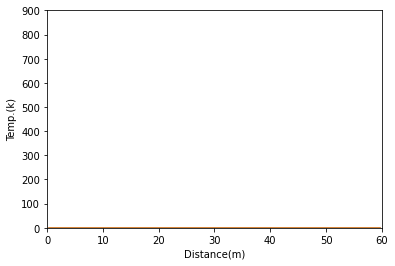

In [68]:
def animate(j):
    plotmap(Tin[j,:],Tout[j,:])
anim = animation.FuncAnimation(plt.figure(), animate, interval=dt, frames=tf, repeat=False)
anim.save("Temperature.gif")
plt.draw()
plt.show()